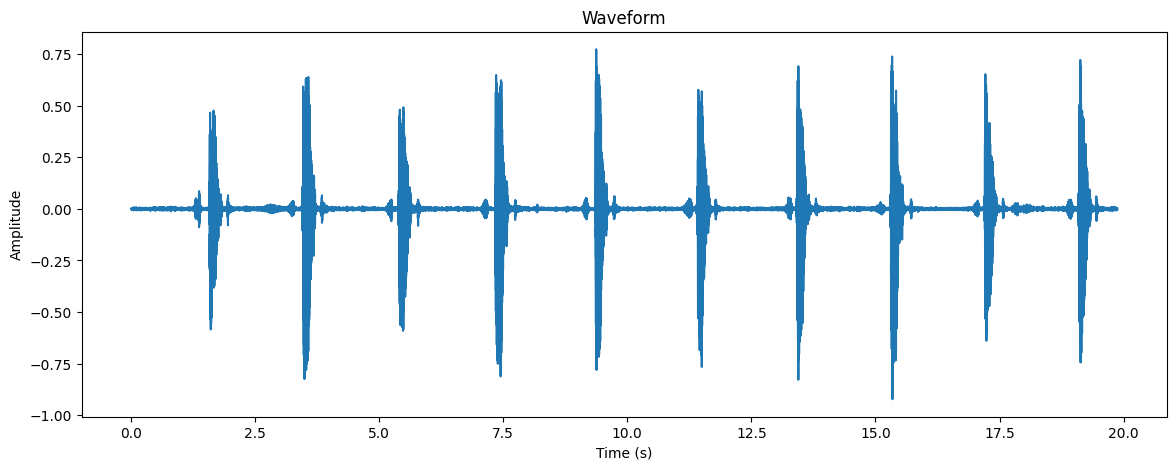

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

#read the file without using numpy
y, sr = librosa.load('test.wav', sr=None)


# Calculate time axis
time = np.linspace(0, len(y) / sr, num=len(y))

# Plot
plt.figure(figsize=(14, 5))
plt.plot(time, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

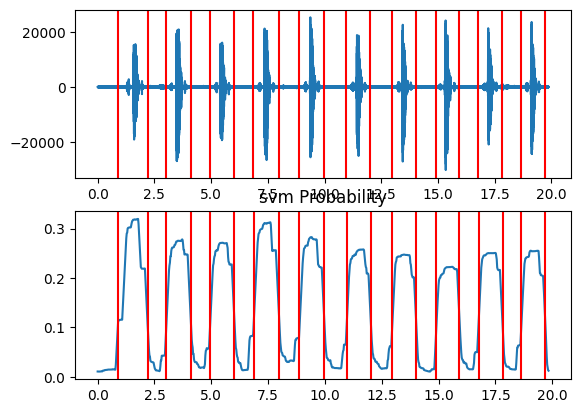

Duration 0: 1.3 sec
Duration 1: 1.0799791666666667 sec
Duration 2: 1.06 sec
Duration 3: 1.14 sec
Duration 4: 1.1 sec
Duration 5: 1.06 sec
Duration 6: 1.06 sec
Duration 7: 1.02 sec
Duration 8: 1.06 sec
Duration 9: 1.06 sec


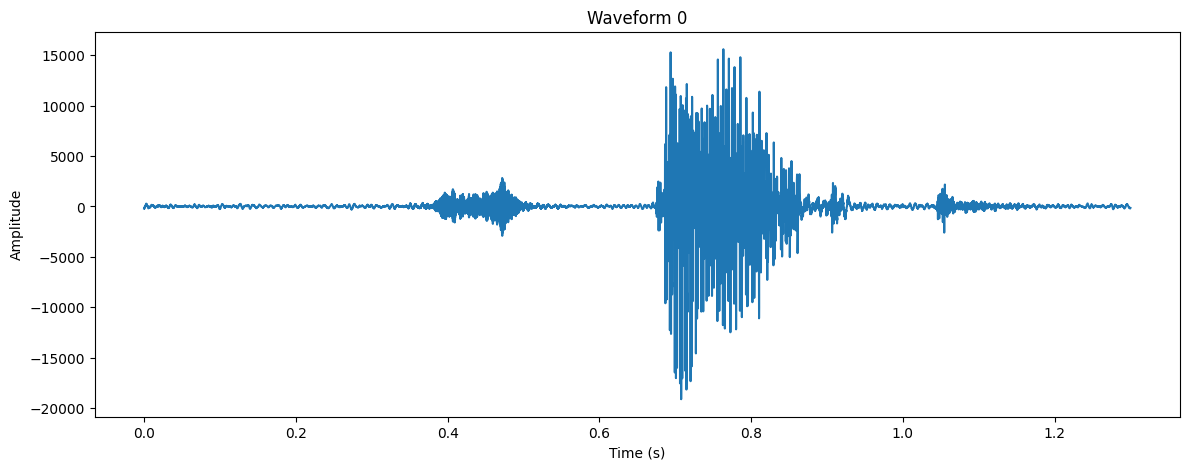

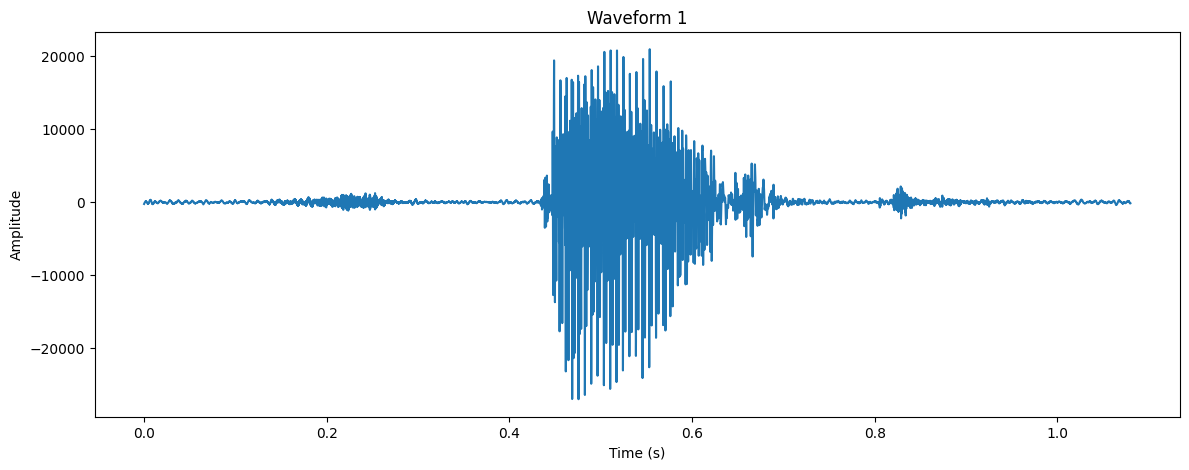

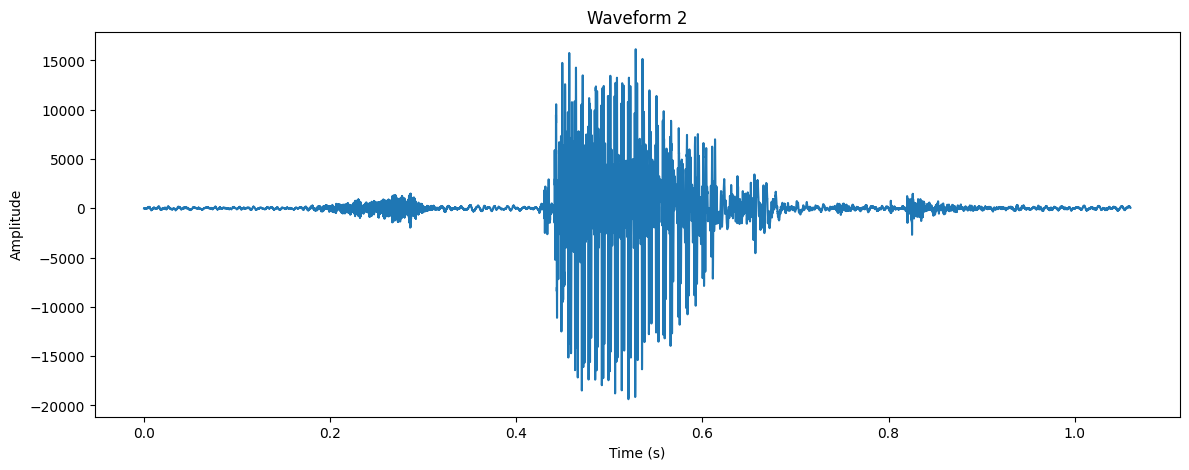

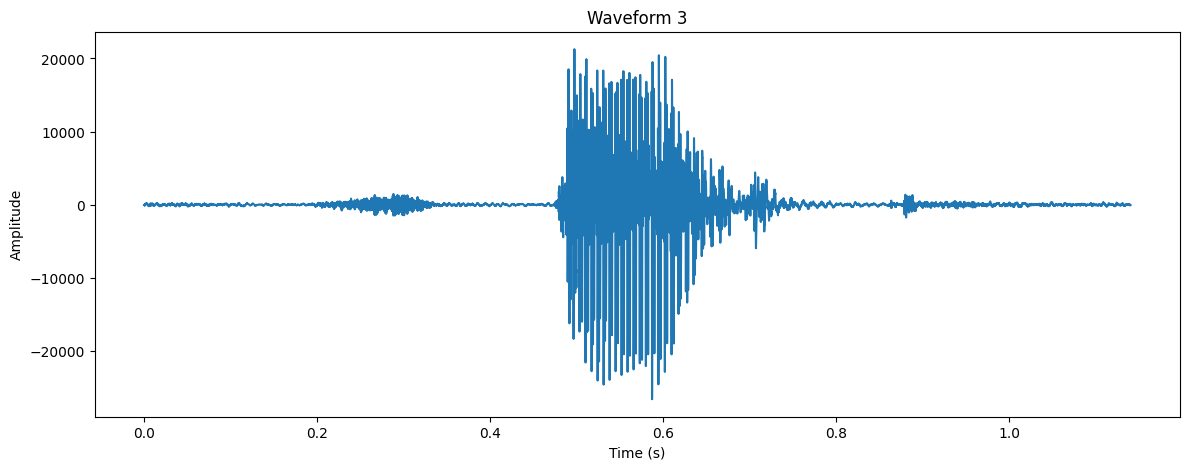

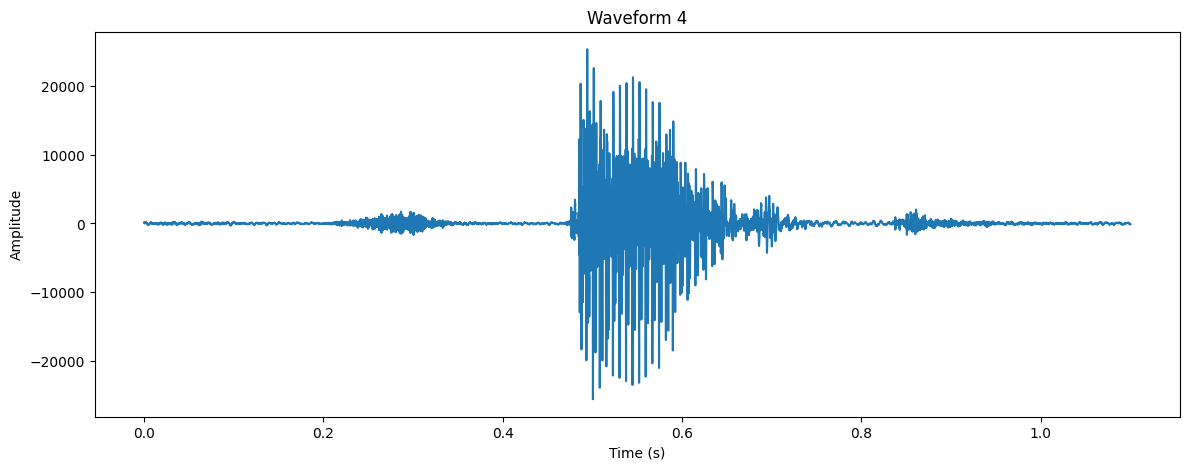

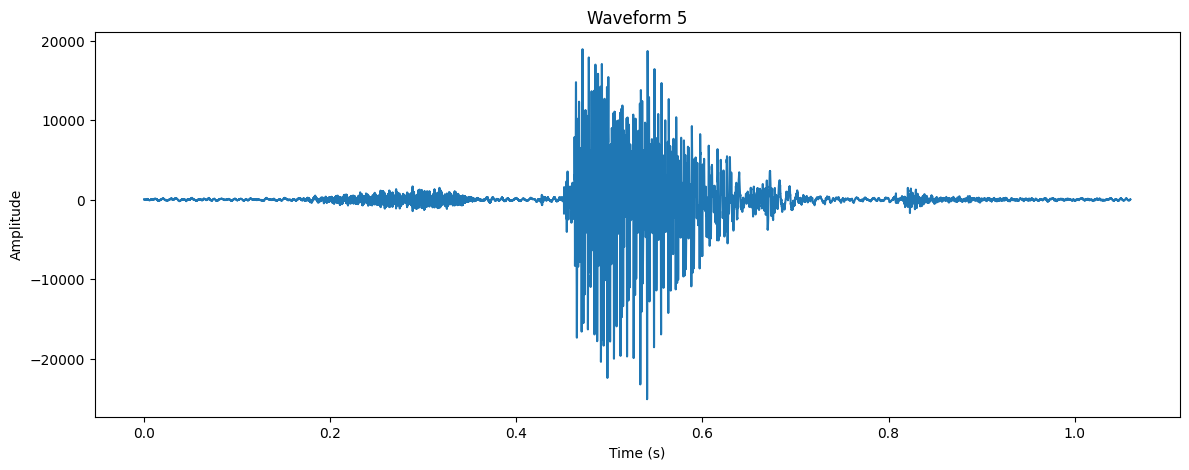

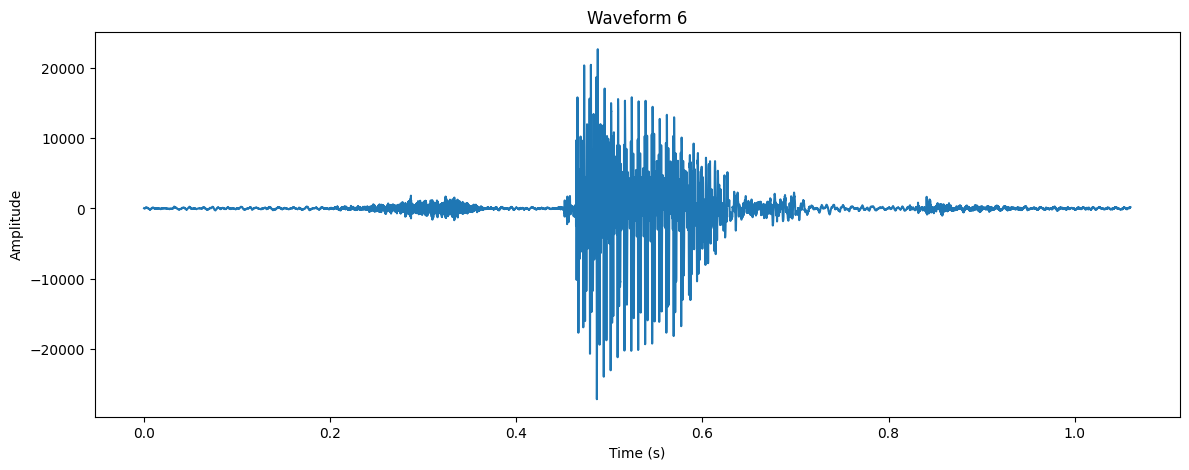

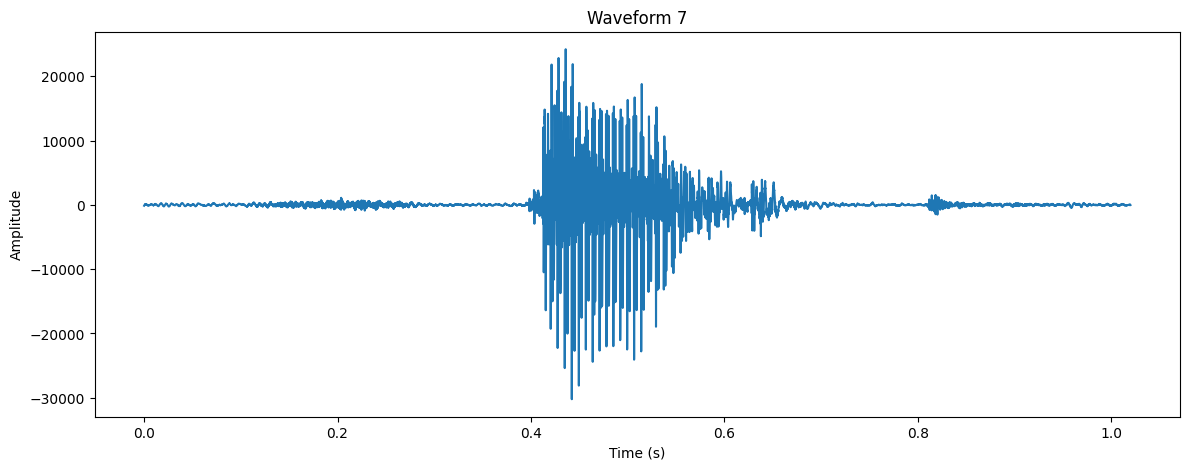

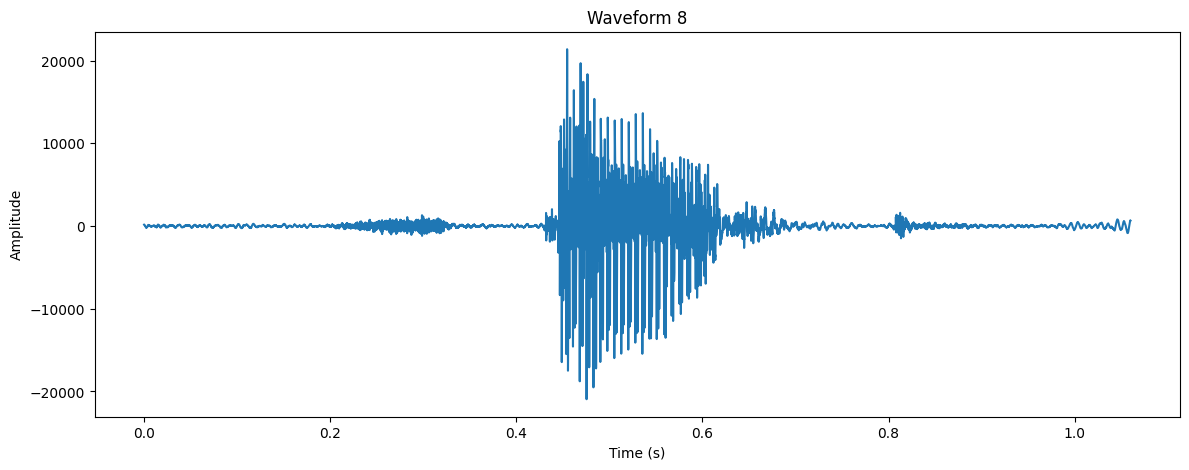

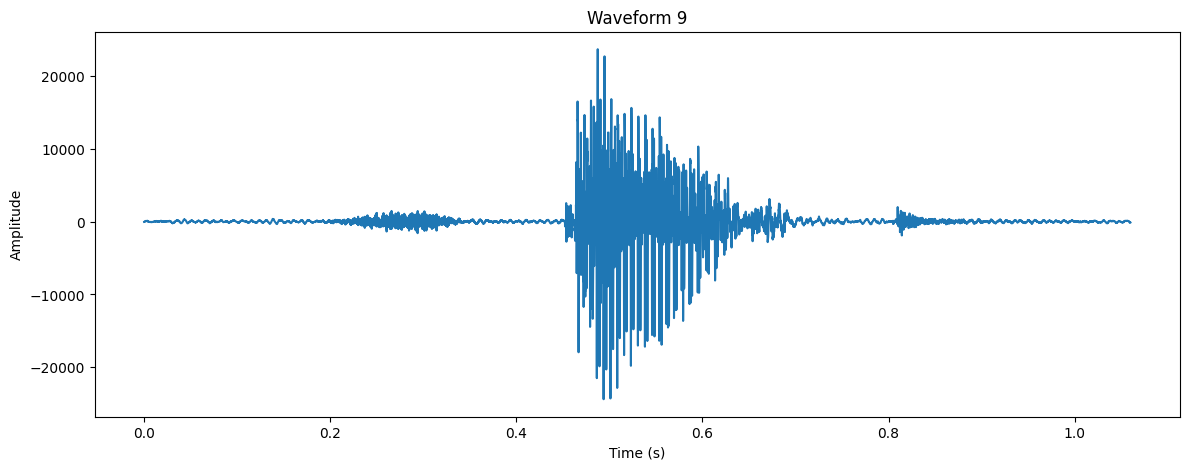

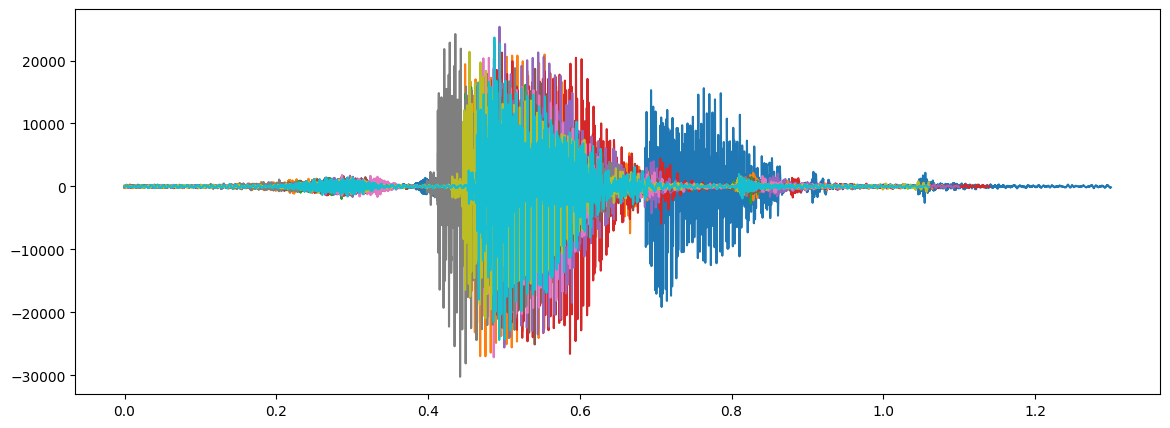

In [25]:
# Import required libraries
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa

# Path to audio file
path = 'test.wav'

# Read the audio file
[Fs, x] = aIO.read_audio_file(path)

# Get non-silent segments
# arguments: signal, sampling frequency, short-term window size and step, window (in seconds) used to smooth the SVM probabilistic sequence,
# a factor between 0 and 1 that specifies how "strict" the thresholding is and finally a boolean associated to the ploting of the results
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window=1.0, weight=0.3, plot=True)


#vezi IOM - sau da run in python 

# Convert segments from time to samples
segments_samples = [(int(start * Fs), int(end * Fs)) for start, end in segments]

# Save all non-silent segments to different files
for i, (start, end) in enumerate(segments_samples):
    segment_audio = x[start:end]
    sf.write(f"segment_{i}.wav", segment_audio, Fs)

# Print the duration of each non-silent segment
for i, (start, end) in enumerate(segments_samples):
    duration = (end - start) / Fs
    print(f"Duration {i}: {duration} sec")

# Plot the waveform of each non-silent segment without using librosa.display
for i, (start, end) in enumerate(segments_samples):
    segment_audio = x[start:end]
    time = np.linspace(0, len(segment_audio) / Fs, num=len(segment_audio))
    plt.figure(figsize=(14, 5))
    plt.plot(time, segment_audio)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform {i}')
    plt.show()

#plot all waveforms in one plot, each signal one after the other 

#daca vreau sa le pun impreuna
#padding cu zero descrescator

In [6]:
import os

# total number of files
path = 'dataset'
nr = 0
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name))])  # all directories
for folder in folders:
    contents = os.listdir(os.path.join(path, folder))  # list of contents
    nr += len(contents)
    # print(folder,len(contents))
print(nr)


19091


In [8]:
import os
import shutil
import random

random.seed(42)

train_set = 'Train_set_2'
test_set = 'Test_set_2'
valid_set = 'Valid_set_2'

train_ratio = 0.7
test_ratio = 0.2
valid_ratio = 0.1

# Function to remove existing files in directories
def clear_directory(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)

# Copy files in directories
def copy_files(file_list, destination_dir):
    for file_path in file_list:
        shutil.copy(file_path, destination_dir)

clear_directory(train_set)
clear_directory(test_set)
clear_directory(valid_set)

# List all files recursively
all_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        all_files.append(os.path.join(root, file))

# Shuffle the file list
random.shuffle(all_files)

# Calculate the split indices
total_files = len(all_files)
train_split = int(total_files * train_ratio)
test_split = int(total_files * (train_ratio + test_ratio))

# Split the file list
train_files = all_files[:train_split]
test_files = all_files[train_split:test_split]
valid_files = all_files[test_split:]

# Copy files to respective directories
copy_files(train_files, train_set)
copy_files(test_files, test_set)
copy_files(valid_files, valid_set)


In [21]:
import os
import random
import csv

random.seed(42)

root_dir = 'dataset'
file_list = []

for dirpath, _, filenames in os.walk(root_dir):
    for filename in filenames:
        file_list.append(os.path.join(dirpath, filename))

random.shuffle(file_list)

train_ratio = 0.7
test_ratio = 0.2
valid_ratio = 0.1

total_files = len(file_list)
train_count = int(train_ratio * total_files)
test_count = int(test_ratio * total_files)
valid_count = total_files - train_count - test_count

train_set = file_list[:train_count]
test_set = file_list[train_count:train_count + test_count]
valid_set = file_list[train_count + test_count:]

# speaker_id = {
#     'Adi' : 0,
#     'Anca': 1,
#     'Bobo': 2,
#     'Danila': 3,
#     'Luci': 4,
#     'Mada': 5,
#     'Oana': 6,
#     'Toni': 7
# }

class_names = {
    'down': 0,
    'left': 1,
    'right': 2,
    'stop': 3,
    'up': 4
}


sets = {'train': 0, 'test': 1, 'valid': 2}

#get each file from 'dataset' directory and write it to the CSV file and assign it to a set, no speaker id
def write_to_csv(file_list, set):
    with open('dataset_2.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        #go through each subdirectory
        for file in file_list:
            #get the class name
            class_name = os.path.basename(os.path.dirname(file))
            #write the file name, set and class name to the CSV file, but exclude main directory name, just the subdirectory and the file name
            writer.writerow([os.path.join(os.path.basename(os.path.dirname(file)), os.path.basename(file)), set, class_names[class_name]])


# Clear existing dataset CSV file
with open('dataset_2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['file_name', 'set', 'class'])

# Write information for train, test, and valid sets to CSV
write_to_csv(train_set, sets['train'])
write_to_csv(test_set, sets['test'])
write_to_csv(valid_set, sets['valid'])


dataset\up\462e1919_nohash_0.wav
(16000, array([ 671, 1269, 1020, ...,  576,  551,  811], dtype=int16))


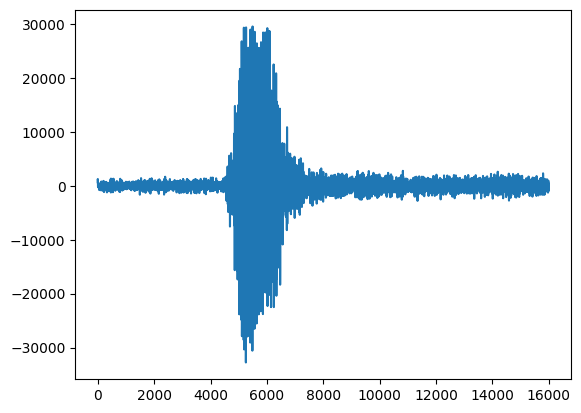

16000
1.0 seconds


In [22]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa 


print(test_files[8])
input_data = read(test_files[8])
audio = input_data[1]
print(input_data)

plt.plot(audio)
plt.show()

y, sr = librosa.load(test_files[6], sr=None)
Audio(data=y, rate=sr)
print(sr)
duration = librosa.get_duration(y=y, sr=sr)

print(duration, "seconds")

In [19]:
import os
import soundfile as sf
import librosa
import numpy as np

path = 'dataset/down'
new_sample_rate = 16000

# Get a list of all files in the specified path
files = [os.path.join(path, name) for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

for file in files:
    # Load the audio file
    y, sr = librosa.load(file, sr=None)
    
    # Resample the audio to 16000 Hz
    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)
    
    # Trim the audio to exactly one second if its duration is greater than 1 second
    if len(y_resampled) > new_sample_rate:
        start_index = len(y_resampled) - new_sample_rate
        y_one_second = y_resampled[start_index:]
    else:
        # Pad the audio with zeros if its duration is less than 1 second
        num_zeros = new_sample_rate - len(y_resampled)
        y_one_second = np.concatenate((y_resampled, np.zeros(num_zeros)))

    y_normalized = y_one_second / np.max(np.abs(y_one_second))

    # Save the resampled and trimmed audio (overwrite the existing files)
    sf.write(file, y_normalized, new_sample_rate)


In [20]:
import os
import librosa

path = 'dataset/down'

# Get a list of all files in the folder
files = [os.path.join(path, name) for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

# Initialize variables to store the duration and sample rate of the first file
first_duration = None
first_sr = None

# Iterate through each file
for file in files:
    # Load the audio file and get its duration and sample rate
    y, sr = librosa.load(file, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    
    # If this is the first file, store its duration and sample rate
    if first_duration is None:
        first_duration = duration
        first_sr = sr
    else:
        # Compare the duration and sample rate of this file with the first file
        if duration != first_duration or sr != first_sr:
            print(f"File {file} has different duration or sample rate.")
            print(f"Expected duration: {first_duration}, Sample rate: {first_sr}")
            print(f"Actual duration: {duration}, Sample rate: {sr}")


In [2]:
# import torch
import torch


class_names = {
    'down': 0,
    'left': 1,
    'right': 2,
    'stop': 3,
    'up': 4
}

sets = {'train': 0, 'test': 1, 'valid': 2}


def label_to_index(labels_dict, word):
    # Return the index corresponding to the word in the labels dictionary
    return torch.tensor(labels_dict[word])


def index_to_label(labels_dict, index):
    # Return the word corresponding to the index in the labels dictionary
    for word, idx in labels_dict.items():
        if idx == index:
            return word
    return None  # Return None if index is not found


# Example usage:
word_start = "up"
index = label_to_index(class_names, word_start)
word_recovered = index_to_label(class_names, index)

print(word_start, "-->", index.item(), "-->", word_recovered)


print(word_start, "-->", index.item(), "-->", word_recovered)

word_start = "test"
index = label_to_index(sets, word_start)
word_recovered = index_to_label(sets, index)

print(word_start, "-->", index.item(), "-->", word_recovered)



up --> 4 --> up
up --> 4 --> up
test --> 1 --> test


In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
import pandas as pd
from torch.utils.data import Dataset
import os
import torchaudio

class My_Dataset(Dataset):

    def __init__(self, csv_file, root_dir, set_number):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the audio files.
            set_number (int): Set number to filter the samples.
        """
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.set_number = set_number
        self.filtered_indices = self.filter()

    def __len__(self):
        return len(self.filtered_indices)

    def filter(self):
        filtered_indices = []
        for idx in range(len(self.data)):
            set_value = int(self.data.iloc[idx, 1])
            if set_value == self.set_number:
                filtered_indices.append(idx)
        return filtered_indices

    def __getitem__(self, idx):
        idx = self.filtered_indices[idx]
        file = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        class_label = int(self.data.iloc[idx, 2])
        waveform, _ = torchaudio.load(file)
        return waveform, class_label

csv_file = 'dataset_2.csv'
root_dir = 'dataset'
train_dataset = My_Dataset(csv_file, root_dir, 0)
test_dataset = My_Dataset(csv_file, root_dir, 1)
valid_dataset = My_Dataset(csv_file, root_dir, 2)
print(train_dataset[0])
print(test_dataset[0])
print(valid_dataset[0])


(tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0458,  0.0068,  0.0377]]), 1)
(tensor([[-0.0005, -0.0052,  0.0002,  ...,  0.0111,  0.0040,  0.0000]]), 4)
(tensor([[0.0018, 0.0032, 0.0043,  ..., 0.0025, 0.0015, 0.0013]]), 2)


In [5]:
batch_size = 64


if device == "cuda":
    num_workers = 2
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False


train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=pin_memory,
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

In [6]:
classes = ['down', 'left', 'right', 'stop', 'up']

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class M4(nn.Module):
    def __init__(self, n_input=1, n_output=5, stride=16, n_channel=32):
        super().__init__()
        self.conv1 = nn.Conv1d(n_input, n_channel, kernel_size=80, stride=stride)
        self.bn1 = nn.BatchNorm1d(n_channel)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(n_channel, n_channel, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(n_channel)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(n_channel, 2 * n_channel, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(2 * n_channel)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(2 * n_channel, 2 * n_channel, kernel_size=3)
        self.bn4 = nn.BatchNorm1d(2 * n_channel)
        self.pool4 = nn.MaxPool1d(4)
        # self.fc1 = nn.Linear(2 * n_channel, n_output)
        self.fc1 = nn.LazyLinear(n_output)
    

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = F.avg_pool1d(x, x.shape[-1])
        x = x.permute(0, 2, 1)
        x = self.fc1(x)
        x = x.squeeze(1)
        return F.log_softmax(x, dim=1)


model = M4(n_input=1, n_output=len(classes))
model.to(device)
model(torch.randn([64, 1, 16000]))
print(model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


n = count_parameters(model)
print("Number of parameters: %s" % n)

M4(
  (conv1): Conv1d(1, 32, kernel_size=(80,), stride=(16,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 32, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv1d(64, 64, kernel_size=(3,), stride=(1,))
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=64, out_features=5, bias=True)
)
Number

c:\Users\Antonia\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [8]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)  # reduce the learning after 20 epochs by a factor of 10

In [9]:
def train(model, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.to(device)
        target = target.to(device)

        output = model(data)

        # negative log-likelihood for a tensor of size (batch x 1 x n_output)
        loss = F.nll_loss(output.squeeze(), target)

        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # print training stats
        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")


In [10]:
def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)


def test(model, epoch):
    model.eval()
    correct = 0
    for data, target in test_loader:

        data = data.to(device)
        target = target.to(device)

        # apply transform and model on whole batch directly on device
        # data = transform(data)
        output = model(data)

        pred = get_likely_index(output)
        correct += number_of_correct(pred, target)

        # update progress bar
        # pbar.update(pbar_update)

    print(f"\nTest Epoch: {epoch}\tAccuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")

In [13]:
import torch
from tqdm import tqdm

log_interval = 20
n_epoch = 100

pbar_update = 1 / (len(train_loader) + len(test_loader))
losses = []

# The transform needs to live on the same device as the model and the data.
# transform = transform.to(device)
with tqdm(total=n_epoch) as pbar:
    for epoch in range(1, n_epoch + 1):
        train(model, epoch, log_interval)
        test(model, epoch)
        torch.save(model.state_dict(), 'gsc_best.pt')
        scheduler.step()


  0%|          | 0/100 [00:00<?, ?it/s]

Train Epoch: 1 [0/13363 (0%)]	Loss: 0.315421
Train Epoch: 1 [1280/13363 (10%)]	Loss: 0.306292
Train Epoch: 1 [2560/13363 (19%)]	Loss: 0.350876
Train Epoch: 1 [3840/13363 (29%)]	Loss: 0.421745
Train Epoch: 1 [5120/13363 (38%)]	Loss: 0.462616
Train Epoch: 1 [6400/13363 (48%)]	Loss: 0.430039
Train Epoch: 1 [7680/13363 (57%)]	Loss: 0.566127
Train Epoch: 1 [8960/13363 (67%)]	Loss: 0.259149
Train Epoch: 1 [10240/13363 (77%)]	Loss: 0.201825
Train Epoch: 1 [11520/13363 (86%)]	Loss: 0.205000
Train Epoch: 1 [12800/13363 (96%)]	Loss: 0.319199

Test Epoch: 1	Accuracy: 3497/3818 (92%)

Train Epoch: 2 [0/13363 (0%)]	Loss: 0.227255
Train Epoch: 2 [1280/13363 (10%)]	Loss: 0.235667
Train Epoch: 2 [2560/13363 (19%)]	Loss: 0.227720
Train Epoch: 2 [3840/13363 (29%)]	Loss: 0.252588
Train Epoch: 2 [5120/13363 (38%)]	Loss: 0.224751
Train Epoch: 2 [6400/13363 (48%)]	Loss: 0.184619
Train Epoch: 2 [7680/13363 (57%)]	Loss: 0.214660
Train Epoch: 2 [8960/13363 (67%)]	Loss: 0.267596
Train Epoch: 2 [10240/13363 (77%

  0%|          | 0/100 [26:26<?, ?it/s]


Test Epoch: 100	Accuracy: 3681/3818 (96%)



In [14]:
def predict(tensor):
    # Use the model to predict the label of the waveform
    tensor = tensor.to(device)
    tensor = model(tensor.unsqueeze(0))
    tensor = get_likely_index(tensor)
    return tensor

nr = 0
for i in range(len(valid_dataset)):
    waveform, utterance = valid_dataset[i]
    if utterance != predict(waveform).item():
        nr += 1
        print(f"Expected: {utterance}. Predicted: {predict(waveform).item()}.")

print(nr)

Expected: 2. Predicted: 3.
Expected: 3. Predicted: 4.
Expected: 3. Predicted: 4.
Expected: 2. Predicted: 0.
Expected: 1. Predicted: 0.
Expected: 2. Predicted: 1.
Expected: 2. Predicted: 3.
Expected: 2. Predicted: 1.
Expected: 3. Predicted: 1.
Expected: 3. Predicted: 0.
Expected: 3. Predicted: 4.
Expected: 3. Predicted: 4.
Expected: 0. Predicted: 1.
Expected: 1. Predicted: 0.
Expected: 0. Predicted: 3.
Expected: 0. Predicted: 3.
Expected: 3. Predicted: 0.
Expected: 1. Predicted: 2.
Expected: 1. Predicted: 2.
Expected: 3. Predicted: 0.
Expected: 4. Predicted: 0.
Expected: 1. Predicted: 4.
Expected: 4. Predicted: 3.
Expected: 3. Predicted: 4.
Expected: 2. Predicted: 1.
Expected: 3. Predicted: 0.
Expected: 3. Predicted: 4.
Expected: 2. Predicted: 1.
Expected: 2. Predicted: 4.
Expected: 0. Predicted: 3.
Expected: 2. Predicted: 1.
Expected: 0. Predicted: 3.
Expected: 2. Predicted: 0.
Expected: 4. Predicted: 1.
Expected: 0. Predicted: 1.
Expected: 0. Predicted: 2.
Expected: 3. Predicted: 0.
E

: 

    MEL SPECTOGRAMS - RESNET18
    

(128, 126)


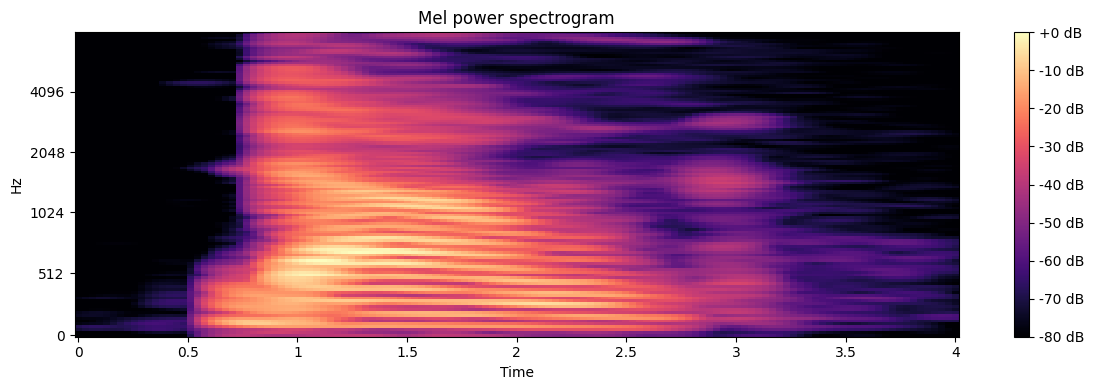

In [5]:
path = 'dataset/down/0a2b400e_nohash_0.wav'
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load(path, sr = None, mono = True)
m = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
# calculate de spectogram and make dimensions 128x128
S = librosa.feature.melspectrogram(y=y, sr=16000, n_mels=128, hop_length=128, n_fft=2048) 
log_S = librosa.power_to_db(S, ref=np.max)

print(log_S.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis = 'time', y_axis='mel')
plt.title('Mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [123]:
classes = ['down', 'left', 'right', 'stop', 'stop', 'up']

In [11]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [7]:
import pandas as pd
from torch.utils.data import Dataset
import os
import librosa
import numpy as np


class My_Dataset(Dataset):
    
        def __init__(self, csv_file, root_dir, set_number):
            """
            Arguments:
                csv_file (string): Path to the csv file with annotations.
                root_dir (string): Directory with all the audio files.
                set_number (int): Set number to filter the samples.
            """
            self.data = pd.read_csv(csv_file)
            self.root_dir = root_dir
            self.set_number = set_number
            self.filtered_indices = self.filter()
    
        def __len__(self):
            return len(self.filtered_indices)
    
        def filter(self):
            filtered_indices = []
            for idx in range(len(self.data)):
                set_value = int(self.data.iloc[idx, 1])
                if set_value == self.set_number:
                    filtered_indices.append(idx)
            return filtered_indices
    
        def __getitem__(self, idx):
            idx = self.filtered_indices[idx]
            file = os.path.join(self.root_dir, self.data.iloc[idx, 0])
            class_label = int(self.data.iloc[idx, 2])
            waveform, _ = librosa.load(file, sr=None)
            #change the dimensions of the spectrogram to 128x128
            spectrogram = librosa.feature.melspectrogram(y=waveform, sr=16000, n_mels=128, hop_length=128, n_fft=2048)
            db_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
            return db_spectrogram, class_label
        
        
csv_file = 'dataset_2.csv'
root_dir = 'dataset'
train_dataset = My_Dataset(csv_file, root_dir, 0)
test_dataset = My_Dataset(csv_file, root_dir, 1)
valid_dataset = My_Dataset(csv_file, root_dir, 2)
print(train_dataset[0])
print(test_dataset[0])
print(valid_dataset[0])


(array([[-80.      , -80.      , -80.      , ..., -63.770638, -62.982185,
        -62.84349 ],
       [-80.      , -80.      , -80.      , ..., -65.80199 , -64.79352 ,
        -64.4497  ],
       [-80.      , -80.      , -80.      , ..., -65.19978 , -64.33488 ,
        -64.140175],
       ...,
       [-80.      , -80.      , -80.      , ..., -72.40333 , -71.44096 ,
        -71.166626],
       [-80.      , -80.      , -80.      , ..., -73.69399 , -72.781006,
        -72.55341 ],
       [-80.      , -80.      , -80.      , ..., -77.99484 , -77.261536,
        -77.180855]], dtype=float32), 1)
(array([[-52.90074 , -52.182373, -51.909706, ..., -39.953922, -40.57688 ,
        -41.523293],
       [-55.104343, -54.104668, -53.55255 , ..., -39.970608, -40.251293,
        -41.137703],
       [-60.9415  , -58.608585, -56.918854, ..., -47.118225, -47.266518,
        -47.628815],
       ...,
       [-79.32549 , -77.915886, -76.9186  , ..., -77.268906, -77.889084,
        -78.865685],
       [-80.  

In [81]:
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader
# from torchvision import datasets
from torchvision.transforms import ToTensor
plt.style.use('ggplot')

batch_size = 64
    
train_loader = DataLoader(
        train_dataset, 
        batch_size=batch_size,
        shuffle=True
    )
valid_loader = DataLoader(
        valid_dataset, 
        batch_size=batch_size,
        shuffle=False
    )

test_loader = DataLoader(
        test_dataset, 
        batch_size=batch_size,
        shuffle=False
    )

for batch, (X, y) in enumerate(train_loader):

    print(X.shape, y.shape)
    if batch == 3:
        break

#dimensiuni: cat mai patrat - 128x128
    

torch.Size([64, 128, 126]) torch.Size([64])
torch.Size([64, 128, 126]) torch.Size([64])
torch.Size([64, 128, 126]) torch.Size([64])
torch.Size([64, 128, 126]) torch.Size([64])


In [82]:
import torch
import torch.nn as nn
import torchvision.models as models


def get_resnet(version=18, freeze=False, num_classes=10, device='cpu', pretrained=None):
    resnet = models.__dict__[f'resnet{version}'](pretrained=True)
    
    if freeze:
        for param in resnet.parameters():
            param.requires_grad = False
    
    # Modify the first convolutional layer to accept 1 input channel
    resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    
    # Modify the fully connected layer to match the number of classes
    resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)
    
    if pretrained:
        resnet.load_state_dict(torch.load(pretrained))
    
    return resnet.to(device)

In [89]:
model = get_resnet(version=18, num_classes=5, device=device)

model.conv1 = torch.nn.Conv2d(64, model.conv1.out_channels, kernel_size=model.conv1.kernel_size, stride=model.conv1.stride, padding=model.conv1.padding, bias=False)
print(model)

ResNet(
  (conv1): Conv2d(64, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
import argparse
import numpy as np
import random

# Optimizer.
optimizer = optim.SGD(model.parameters(), lr=0.001)
# Loss function.
criterion = nn.CrossEntropyLoss()

In [107]:
import torch
from tqdm import tqdm
import torch.nn.functional as F

if device == "cuda":
    num_workers = 2
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        data = data.unsqueeze(1)
        data = data.repeat(1, 64, 1, 1)  # Now data has shape [batch_size, 64, height, width]
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


In [113]:
def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.unsqueeze(1)
            data = data.repeat(1, 64, 1, 1)  # Now data has shape [batch_size, 64, height, width]
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

In [114]:
import torchvision.models as models
import torch.optim as optim

import torchvision


# Learning and training parameters.
epochs = 20
batch_size = 64

log_interval = 20
n_epoch = 5

pbar_update = 1 / (len(train_loader) + len(test_loader))
losses = []
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)  # reduce the learning after 20 epochs by a factor of 10

# The transform needs to live on the same device as the model and the data.
# transform = transform.to(device)
with tqdm(total=n_epoch) as pbar:
    for epoch in range(1, n_epoch + 1):
        # Updated train function call with all required arguments
        train(model, device, train_loader, optimizer, epoch, log_interval)
        test(model, device, test_loader)
        torch.save(model.state_dict(), 'gsc_mfcc.pt')
        scheduler.step()


# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")



  0%|          | 0/5 [00:00<?, ?it/s]

Train Epoch: 1 [0/13363 (0%)]	Loss: 0.333228
Train Epoch: 1 [1280/13363 (10%)]	Loss: 0.209046
Train Epoch: 1 [2560/13363 (19%)]	Loss: 0.302122
Train Epoch: 1 [3840/13363 (29%)]	Loss: 0.261521
Train Epoch: 1 [5120/13363 (38%)]	Loss: 0.347923
Train Epoch: 1 [6400/13363 (48%)]	Loss: 0.214440
Train Epoch: 1 [7680/13363 (57%)]	Loss: 0.286657
Train Epoch: 1 [8960/13363 (67%)]	Loss: 0.172771
Train Epoch: 1 [10240/13363 (77%)]	Loss: 0.312783
Train Epoch: 1 [11520/13363 (86%)]	Loss: 0.159935
Train Epoch: 1 [12800/13363 (96%)]	Loss: 0.254755

Test set: Average loss: 0.0050, Accuracy: 3427/3818 (90%)

Train Epoch: 2 [0/13363 (0%)]	Loss: 0.171656
Train Epoch: 2 [1280/13363 (10%)]	Loss: 0.260549
Train Epoch: 2 [2560/13363 (19%)]	Loss: 0.293669
Train Epoch: 2 [3840/13363 (29%)]	Loss: 0.204797
Train Epoch: 2 [5120/13363 (38%)]	Loss: 0.181706
Train Epoch: 2 [6400/13363 (48%)]	Loss: 0.212512
Train Epoch: 2 [7680/13363 (57%)]	Loss: 0.227117
Train Epoch: 2 [8960/13363 (67%)]	Loss: 0.238046
Train Epoch: 2

  0%|          | 0/5 [1:07:15<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 3606/3818 (94%)

11,370,886 total parameters.
11,370,886 training parameters.


In [116]:
def predict(tensor):
    if isinstance(tensor, np.ndarray):
        tensor = torch.from_numpy(tensor)
    
    # Assuming tensor shape is [1, L] where L is the length of the waveform
    # Replicate the tensor to have 64 channels
    tensor = tensor.repeat(64, 1, 1)  # Adjust this line based on your actual tensor shape and requirements
    
    tensor = tensor.to(device)
    tensor = model(tensor.unsqueeze(0))  # Ensure tensor is in the correct shape for the model
    tensor = get_likely_index(tensor)
    return tensor

nr = 0
for i in range(len(valid_dataset)):
    waveform, utterance = valid_dataset[i]
    if utterance != predict(waveform).item():
        nr += 1
        print(f"Expected: {utterance}. Predicted: {predict(waveform).item()}.")

print(nr)

Expected: 2. Predicted: 1.
Expected: 4. Predicted: 3.
Expected: 0. Predicted: 1.
Expected: 3. Predicted: 0.
Expected: 2. Predicted: 4.
Expected: 4. Predicted: 3.
Expected: 2. Predicted: 3.
Expected: 2. Predicted: 1.
Expected: 2. Predicted: 1.
Expected: 2. Predicted: 0.
Expected: 2. Predicted: 4.
Expected: 4. Predicted: 3.
Expected: 4. Predicted: 0.
Expected: 2. Predicted: 1.
Expected: 1. Predicted: 0.
Expected: 3. Predicted: 4.
Expected: 4. Predicted: 3.
Expected: 2. Predicted: 1.
Expected: 3. Predicted: 4.
Expected: 3. Predicted: 0.
Expected: 0. Predicted: 4.
Expected: 1. Predicted: 0.
Expected: 1. Predicted: 0.
Expected: 0. Predicted: 1.
Expected: 4. Predicted: 1.
Expected: 3. Predicted: 0.
Expected: 3. Predicted: 4.
Expected: 1. Predicted: 3.
Expected: 3. Predicted: 4.
Expected: 3. Predicted: 0.
Expected: 0. Predicted: 2.
Expected: 2. Predicted: 1.
Expected: 1. Predicted: 4.
Expected: 2. Predicted: 4.
Expected: 2. Predicted: 0.
Expected: 1. Predicted: 0.
Expected: 4. Predicted: 3.
E

In [134]:
#voice activity detection
#threshold pe semnal

import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd   
from scipy.io.wavfile import write

freq = 16000
duration = 1
recording = sd.rec(int(duration * freq),
                   samplerate=freq, channels=1)
print("ACUM INCEPE")
sd.wait()
print("S-A TERMINAT")
write("recordings/test0.wav", freq, recording)


ACUM INCEPE
S-A TERMINAT


In [136]:
def predict(tensor):
    if isinstance(tensor, np.ndarray):
        tensor = torch.from_numpy(tensor)
    
    # Assuming tensor shape is [1, L] where L is the length of the waveform
    # Replicate the tensor to have 64 channels
    tensor = tensor.repeat(64, 1, 1)  # Adjust this line based on your actual tensor shape and requirements
    
    tensor = tensor.to(device)
    tensor = model(tensor.unsqueeze(0))  # Ensure tensor is in the correct shape for the model
    tensor = get_likely_index(tensor)
    return tensor

#preditie pentru test0.wav
y, sr = librosa.load('recordings/test0.wav', sr=None)
print(predict(y))
#print the predicted class and the name of the class predicted
print(predict(y).item(), classes[predict(y).item()+1])

# print(f"Predicted: {predict(y).item()}, the command predicted {predict(y).}.")




tensor([4])
4 up


In [140]:
#record 10 audios of 1 second each and save them in the recordings folder
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write

freq = 16000
duration = 1
for i in range(10):
    recording = sd.rec(int(duration * freq),
                       samplerate=freq, channels=1)
    print("Start recording")
    sd.wait()
    print("Stop recording")
    write(f"recordings/test{i}.wav", freq, recording)

#predict the class of each audio file
for i in range(10):
    y, sr = librosa.load(f'recordings/test{i}.wav', sr=None)
    print(predict(y).item(), classes[predict(y).item()])

#print the predicted class and the name of the class predicted

for i in range(10):
    y, sr = librosa.load(f'recordings/test{i}.wav', sr=None)
    print(predict(y).item(), classes[predict(y).item()])    

y, sr = librosa.load('recordings/test0.wav', sr=None)
print(predict(y))


Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
4 stop
tensor([4])


In [141]:
#load model
third = get_resnet(version=18, num_classes=6, device=device)
third.load_state_dict(torch.load('gsc_mfcc.pt'))

c:\Users\Antonia\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Antonia\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for conv1.weight: copying a param with shape torch.Size([64, 64, 7, 7]) from checkpoint, the shape in current model is torch.Size([64, 1, 7, 7]).

In [ ]:
#predictie pe folderul 'recordings'
import os
import torch
import torchaudio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

path = 'recordings'
files = [os.path.join(path, name) for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]
print(files)

class_names = {'down', 'left', 'right', 'stop', 'up'}


def predict_command(tensor):
    tensor = tensor.to(device)
    tensor = third(tensor.unsqueeze(0))
    tensor = get_likely_index(tensor)
    return tensor


predictions = []

for file in files:
    waveform, _ = torchaudio.load(file)
    waveform = waveform.to(device)
    prediction = predict_command(waveform).item()
    predictions.append(prediction)
    print(f"File: {file}, Predicted: {prediction}")


